In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
%matplotlib inline

/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


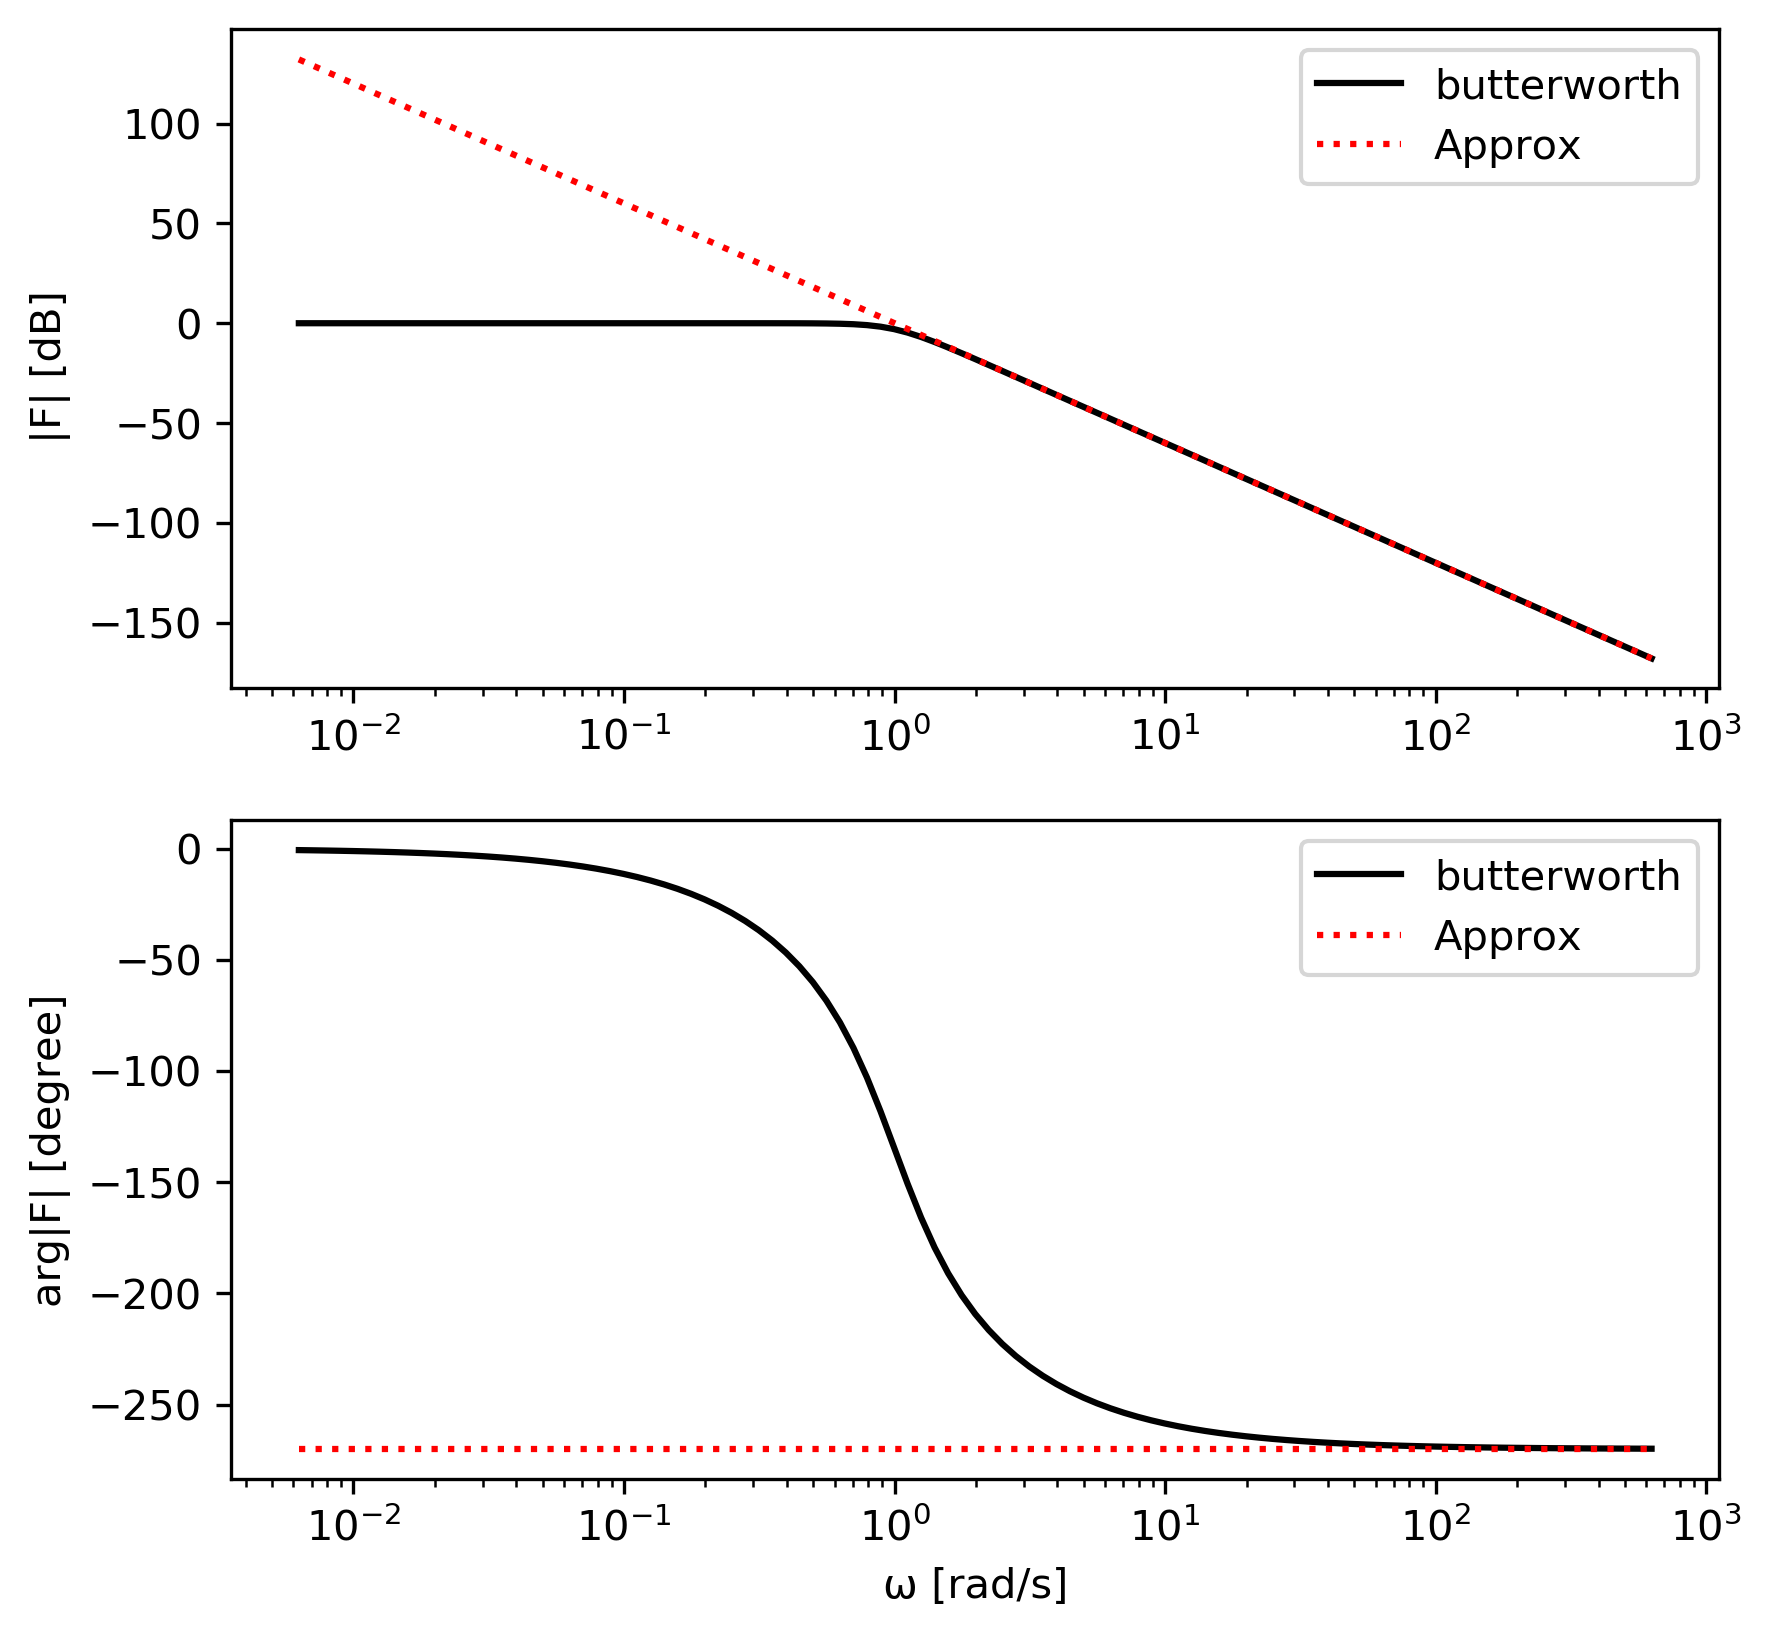

In [88]:
filename = '2_butter.txt' #データファイル名
df = pd.read_table(filename, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
df['Complex'] = df['Re'] + 1j * df['Im']
df['Amp'] = np.absolute(df['Complex'])
df['Amp_dB'] = 20 * np.log10(df['Amp'])
df['Phase'] = np.angle(df['Complex']) * 180 / np.pi

df.loc[df['Phase'] >= 0, 'Phase'] = df['Phase'] - 360




fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

df['Freq'] = df['Freq'] * math.pi * 2

df['approx_c'] = 1 / ( (1j * df['Freq'])  ** 3)
df['approx'] = 20 * np.log10(np.absolute(df['approx_c']))
df['approx_p'] = np.rad2deg(np.unwrap(np.angle(df['approx_c']))) - 360

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color='black', label = 'butterworth')
ax1.plot(df['Freq'], df['approx'], color = 'red', linestyle = 'dotted', label = 'Approx')
ax1.set_ylabel("|F| [dB] ")
ax1.set_xscale("log")
ax1.legend()

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color='black', label = 'butterworth')
ax2.plot(df['Freq'], df['approx_p'], color = 'red', linestyle = 'dotted', label = 'Approx')
ax2.set_xlabel("ω [rad/s]")
ax2.set_ylabel("arg|F| [degree]")
ax2.set_xscale("log")
ax2.legend()

#グラフ画像保存
plt.savefig(filename + 'sim1.png')
plt.show()


/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead.
  # This is added back by InteractiveShellApp.init_path()


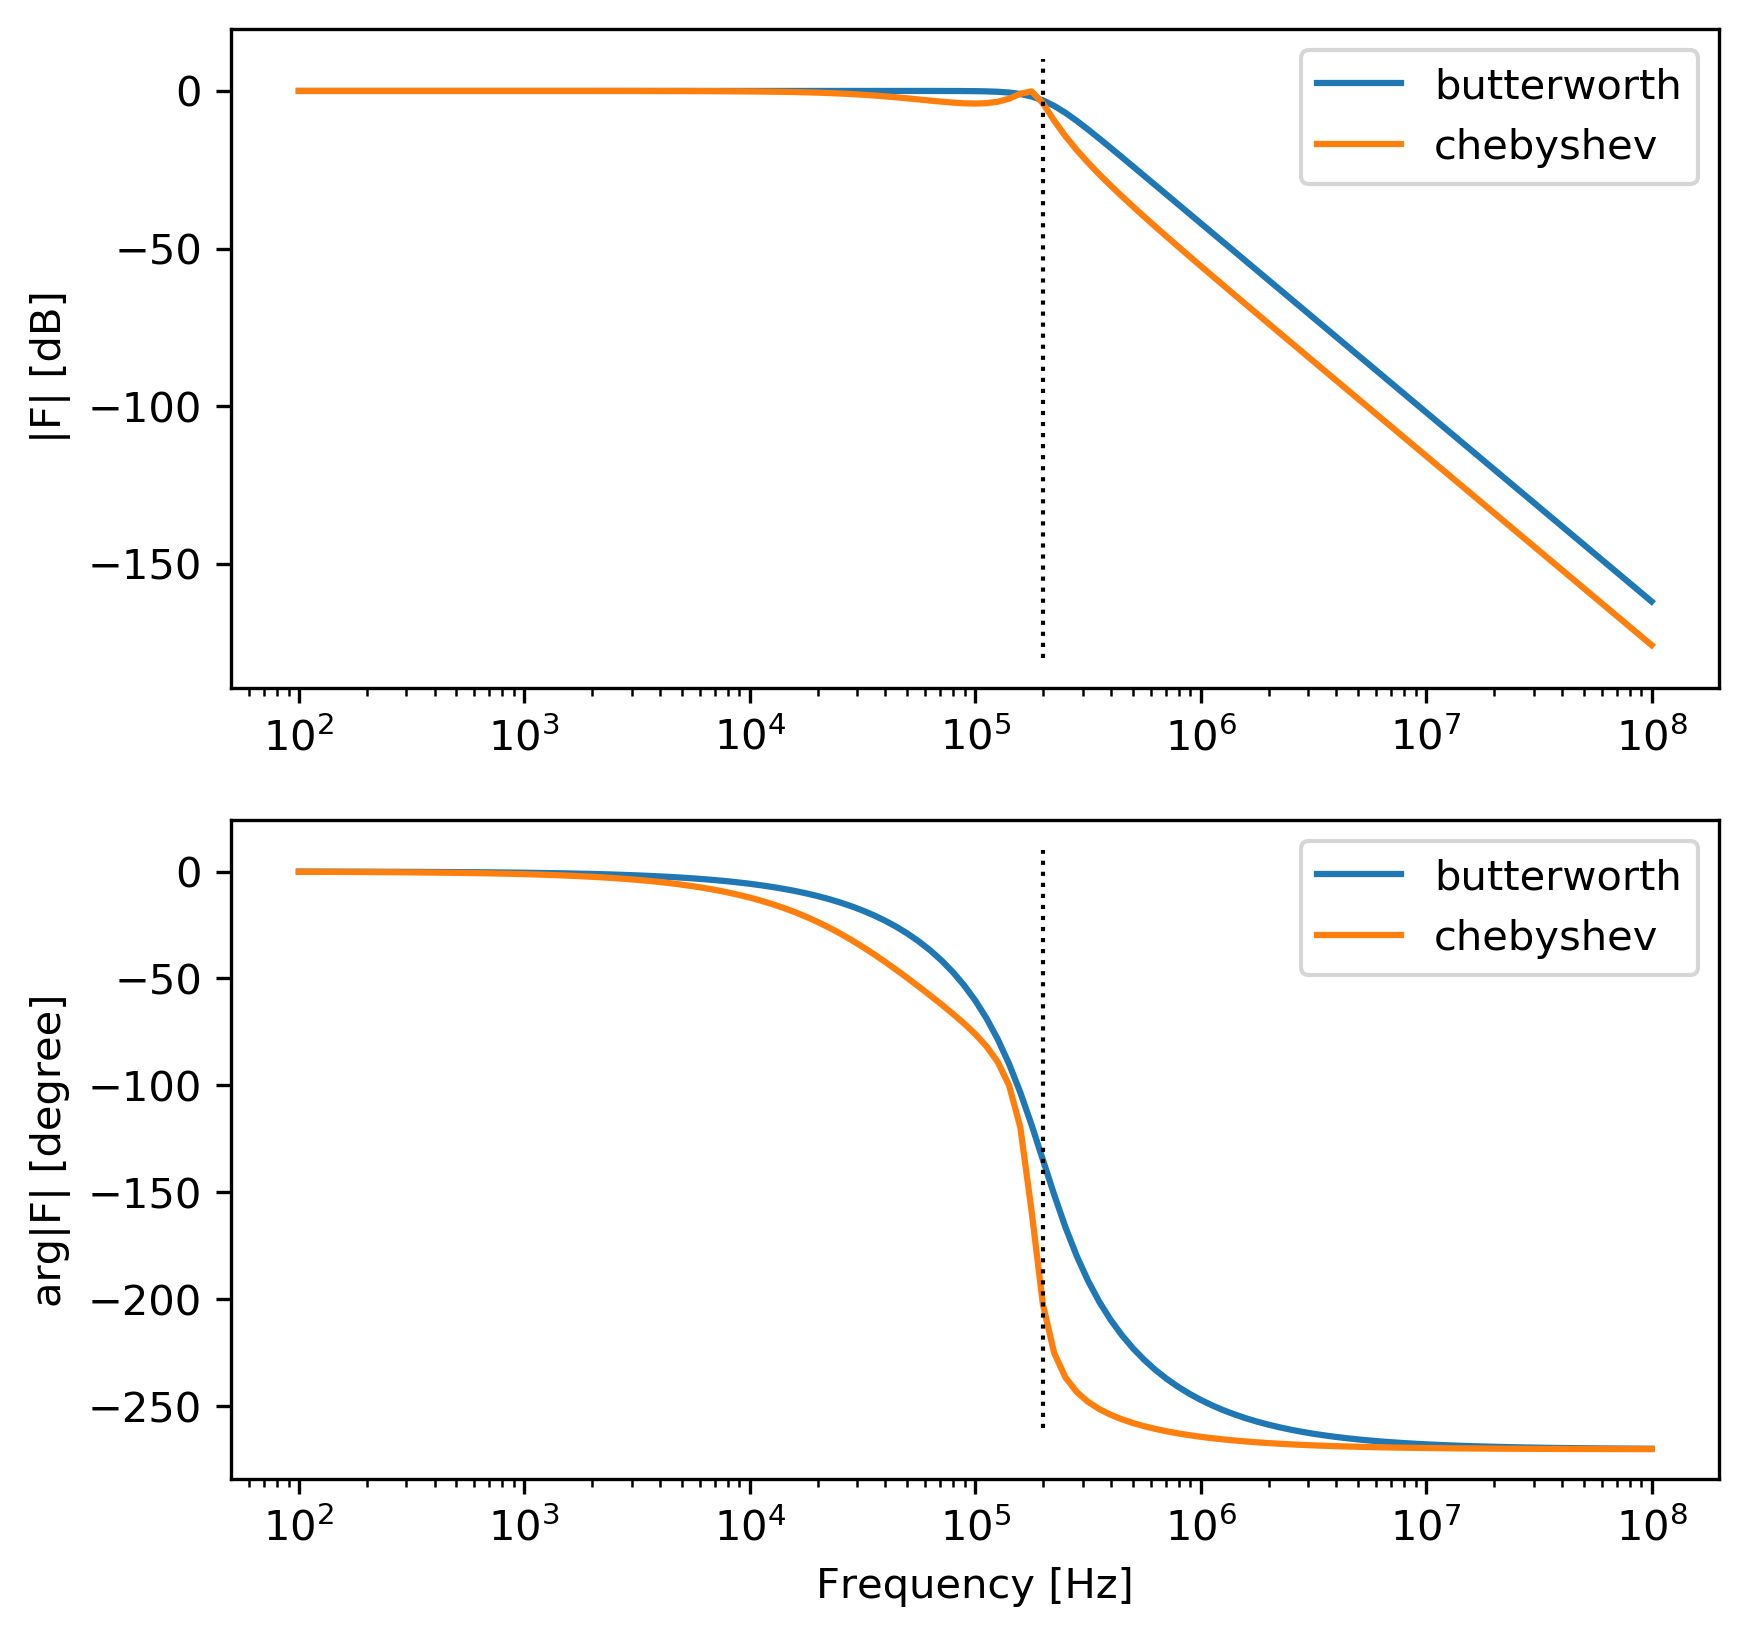

0      -0.000015
1      -0.000019
2      -0.000023
3      -0.000029
4      -0.000037
5      -0.000047
6      -0.000059
7      -0.000074
8      -0.000093
9      -0.000117
10     -0.000148
11     -0.000186
12     -0.000234
13     -0.000295
14     -0.000371
15     -0.000467
16     -0.000589
17     -0.000741
18     -0.000933
19     -0.001174
20     -0.001478
21     -0.001861
22     -0.002342
23     -0.002948
24     -0.003711
25     -0.004672
26     -0.005880
27     -0.007401
28     -0.009314
29     -0.011721
         ...    
90    -13.813367
91    -13.818741
92    -13.823008
93    -13.826395
94    -13.829085
95    -13.831221
96    -13.832917
97    -13.834264
98    -13.835334
99    -13.836184
100   -13.836859
101   -13.837395
102   -13.837820
103   -13.838159
104   -13.838427
105   -13.838641
106   -13.838810
107   -13.838945
108   -13.839052
109   -13.839137
110   -13.839204
111   -13.839258
112   -13.839300
113   -13.839334
114   -13.839361
115   -13.839382
116   -13.839399
117   -13.8394

In [101]:
filename = '3_butter.txt' #データファイル名
filename2 = '3_chev.txt' 

df = pd.read_table(filename, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
df['Complex'] = df['Re'] + 1j * df['Im']
df['Amp'] = np.absolute(df['Complex'])
df['Amp_dB'] = 20 * np.log10(df['Amp'])
df['Phase'] = np.rad2deg(np.unwrap(np.angle(df['Complex'])))


df2 = pd.read_table(filename2, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
df2['Complex'] = df2['Re'] + 1j * df2['Im']
df2['Amp'] = np.absolute(df2['Complex'])
df2['Amp_dB'] = 20 * np.log10(df2['Amp'])
df2['Phase'] = np.rad2deg(np.unwrap(np.angle(df2['Complex'])))


fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'],  label = 'butterworth')
ax1.plot(df2['Freq'], df2['Amp_dB'], label = 'chebyshev')
ax1.plot([200000, 200000], [-180, 10], color='black', linestyle = 'dotted', linewidth = 1.0) 
ax1.set_ylabel("|F| [dB] ")
ax1.set_xscale("log")
ax1.legend()

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], label = 'butterworth')
ax2.plot(df2['Freq'], df2['Phase'], label = 'chebyshev')
ax2.plot([200000, 200000], [-260, 10], color='black', linestyle = 'dotted', linewidth = 1.0) 
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("arg|F| [degree]")
ax2.set_xscale("log")
ax2.legend()

#グラフ画像保存
plt.savefig(filename + '.png')
plt.show()

print(df2['Amp_dB'][:-1] - df['Amp_dB'][:-1])

/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


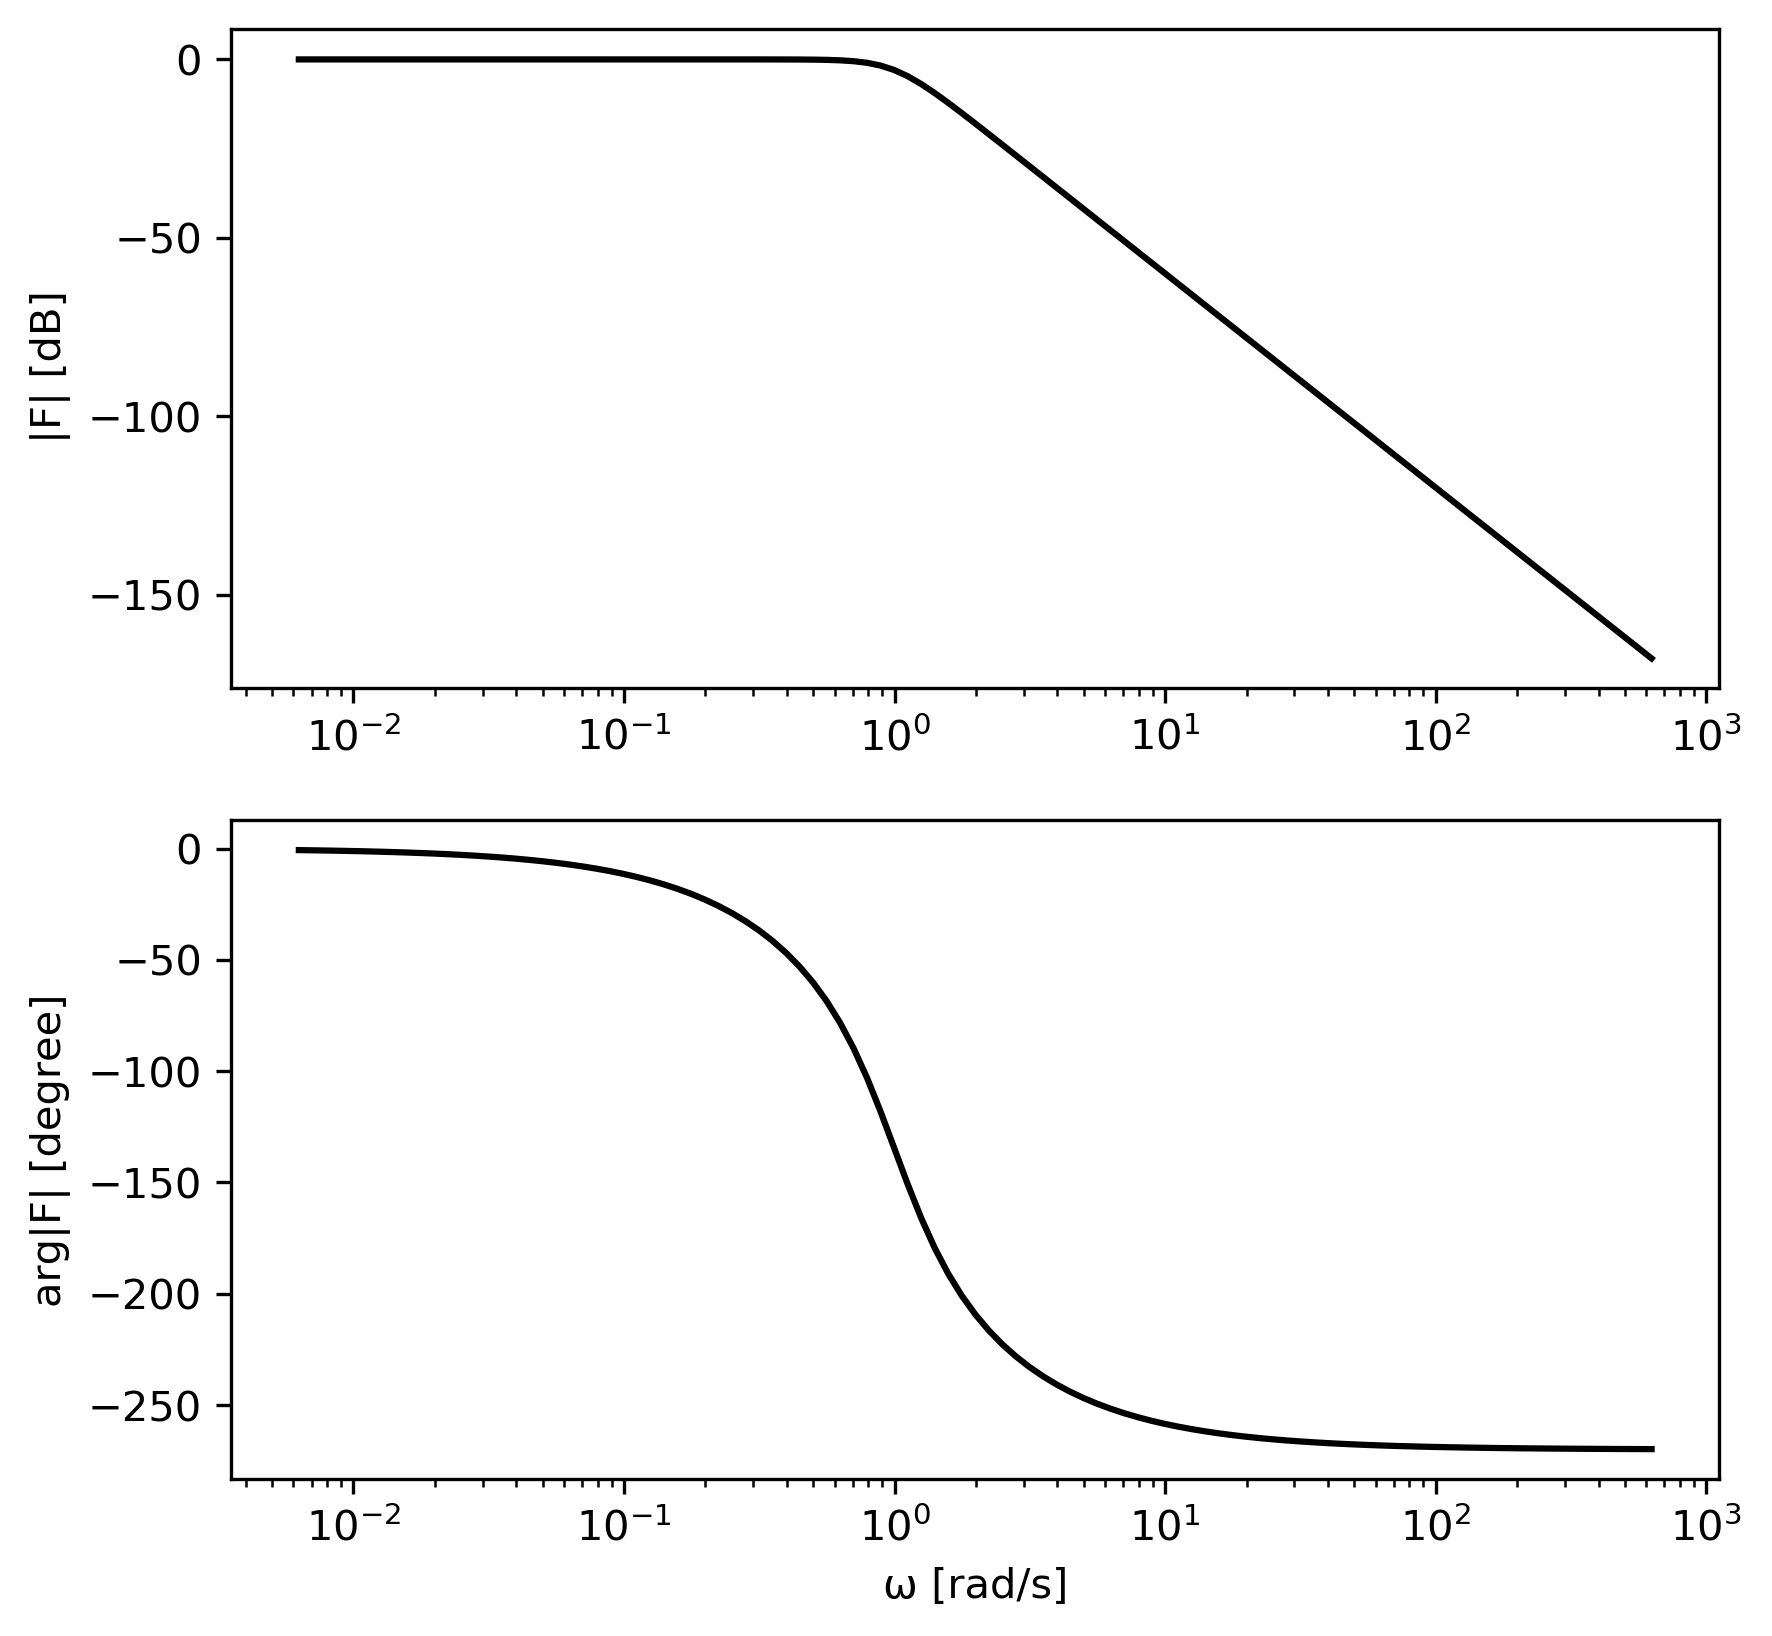

In [77]:
filename = '2_butter.txt' #データファイル名
df = pd.read_table(filename, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
df['Complex'] = df['Re'] + 1j * df['Im']
df['Amp'] = np.absolute(df['Complex'])
df['Amp_dB'] = 20 * np.log10(df['Amp'])
df['Phase'] = np.angle(df['Complex']) * 180 / np.pi

df.loc[df['Phase'] >= 0, 'Phase'] = df['Phase'] - 360

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

df['Freq'] = df['Freq'] * math.pi * 2


#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color='black')
ax1.set_ylabel("|F| [dB] ")
ax1.set_xscale("log")

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color='black')
ax2.set_xlabel("ω [rad/s]")
ax2.set_ylabel("arg|F| [degree]")
ax2.set_xscale("log")

#グラフ画像保存
plt.savefig(filename + 'sim1.png')
plt.show()

/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


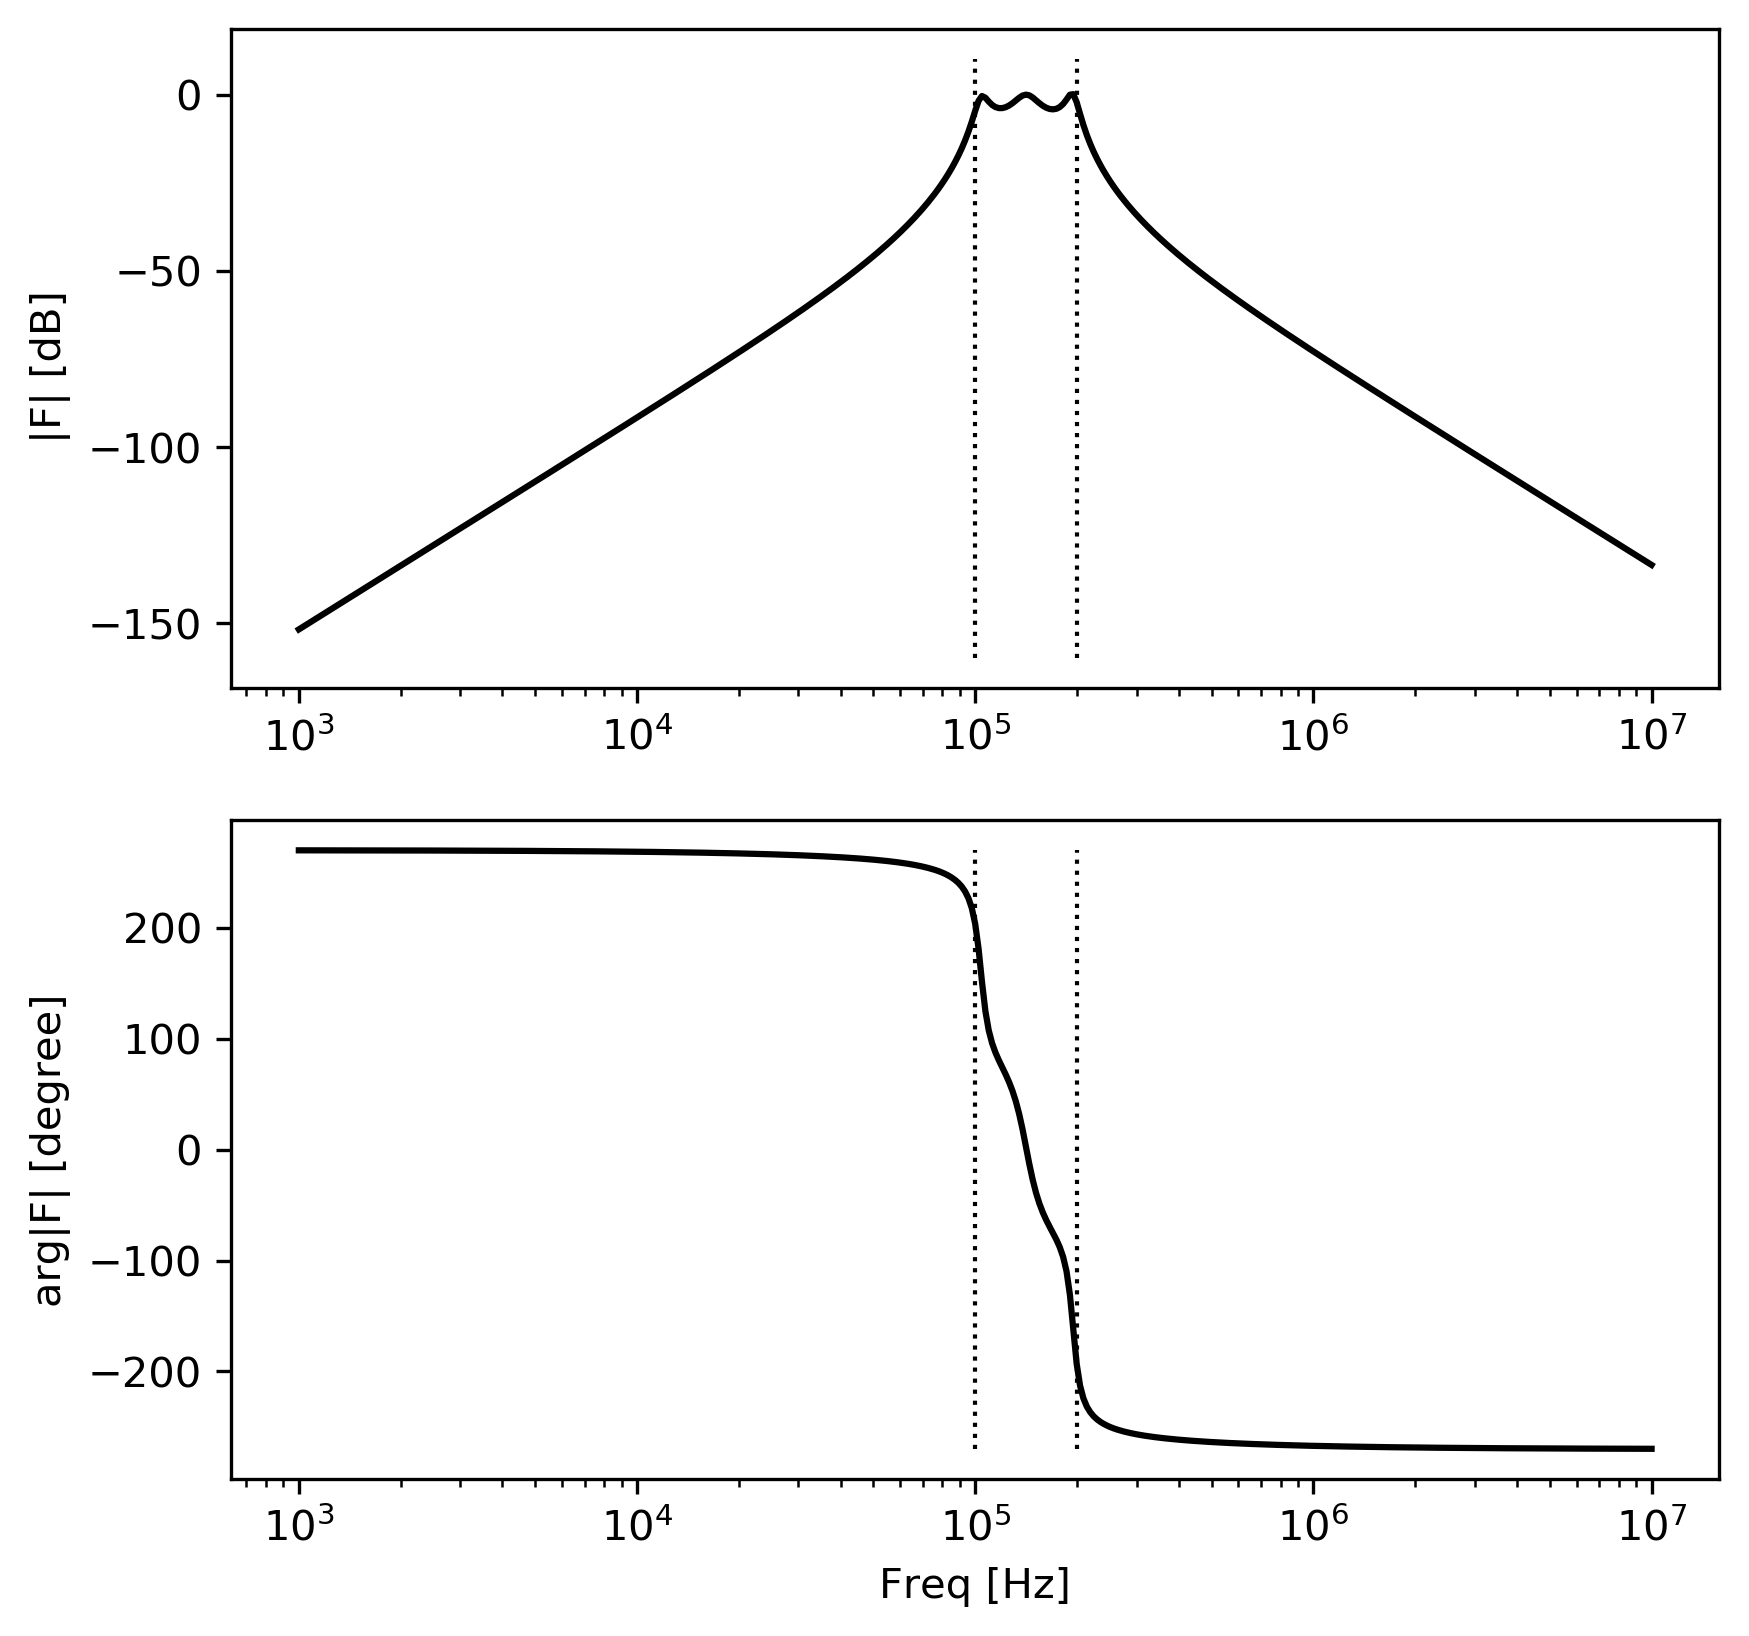

In [59]:
filename = '5_chev.txt' #データファイル名
df = pd.read_table(filename, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
df['Complex'] = df['Re'] + 1j * df['Im']
df['Amp'] = np.absolute(df['Complex'])
df['Amp_dB'] = 20 * np.log10(df['Amp'])
# df['Phase'] = np.angle(df['Complex']) * 180 / np.pi
df['Phase'] = np.rad2deg(np.unwrap(np.angle(df['Complex'])))
df['Phase']  += 360

# df.loc[df['Phase'] <= 0, 'Phase'] = df['Phase'] + 360

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# df['Freq'] = df['Freq'] * math.pi * 2


#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color='black')
ax1.set_ylabel("|F| [dB] ")
ax1.set_xscale("log")
ax1.plot([100000, 100000], [-160, 10], color='black', linestyle = 'dotted', linewidth = 1.0) 
ax1.plot([200000, 200000], [-160, 10], color='black', linestyle = 'dotted', linewidth = 1.0) 

#ax1.plot(df['Freq'], df['theory'], color = 'red', linestyle = 'dotted', label = 'Theory')

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color='black')
ax2.set_xlabel("Freq [Hz]")
ax2.set_ylabel("arg|F| [degree]")
ax2.set_xscale("log")
#ax2.plot([200000, 200000], [0, 270], color='black', linestyle = 'dotted', linewidth = 1.0) 
ax2.plot([100000, 100000], [-270, 270], color='black', linestyle = 'dotted', linewidth = 1.0) 
ax2.plot([200000, 200000], [-270, 270], color='black', linestyle = 'dotted', linewidth = 1.0) 

#グラフ画像保存
plt.savefig(filename + 'sim1.png')
plt.show()

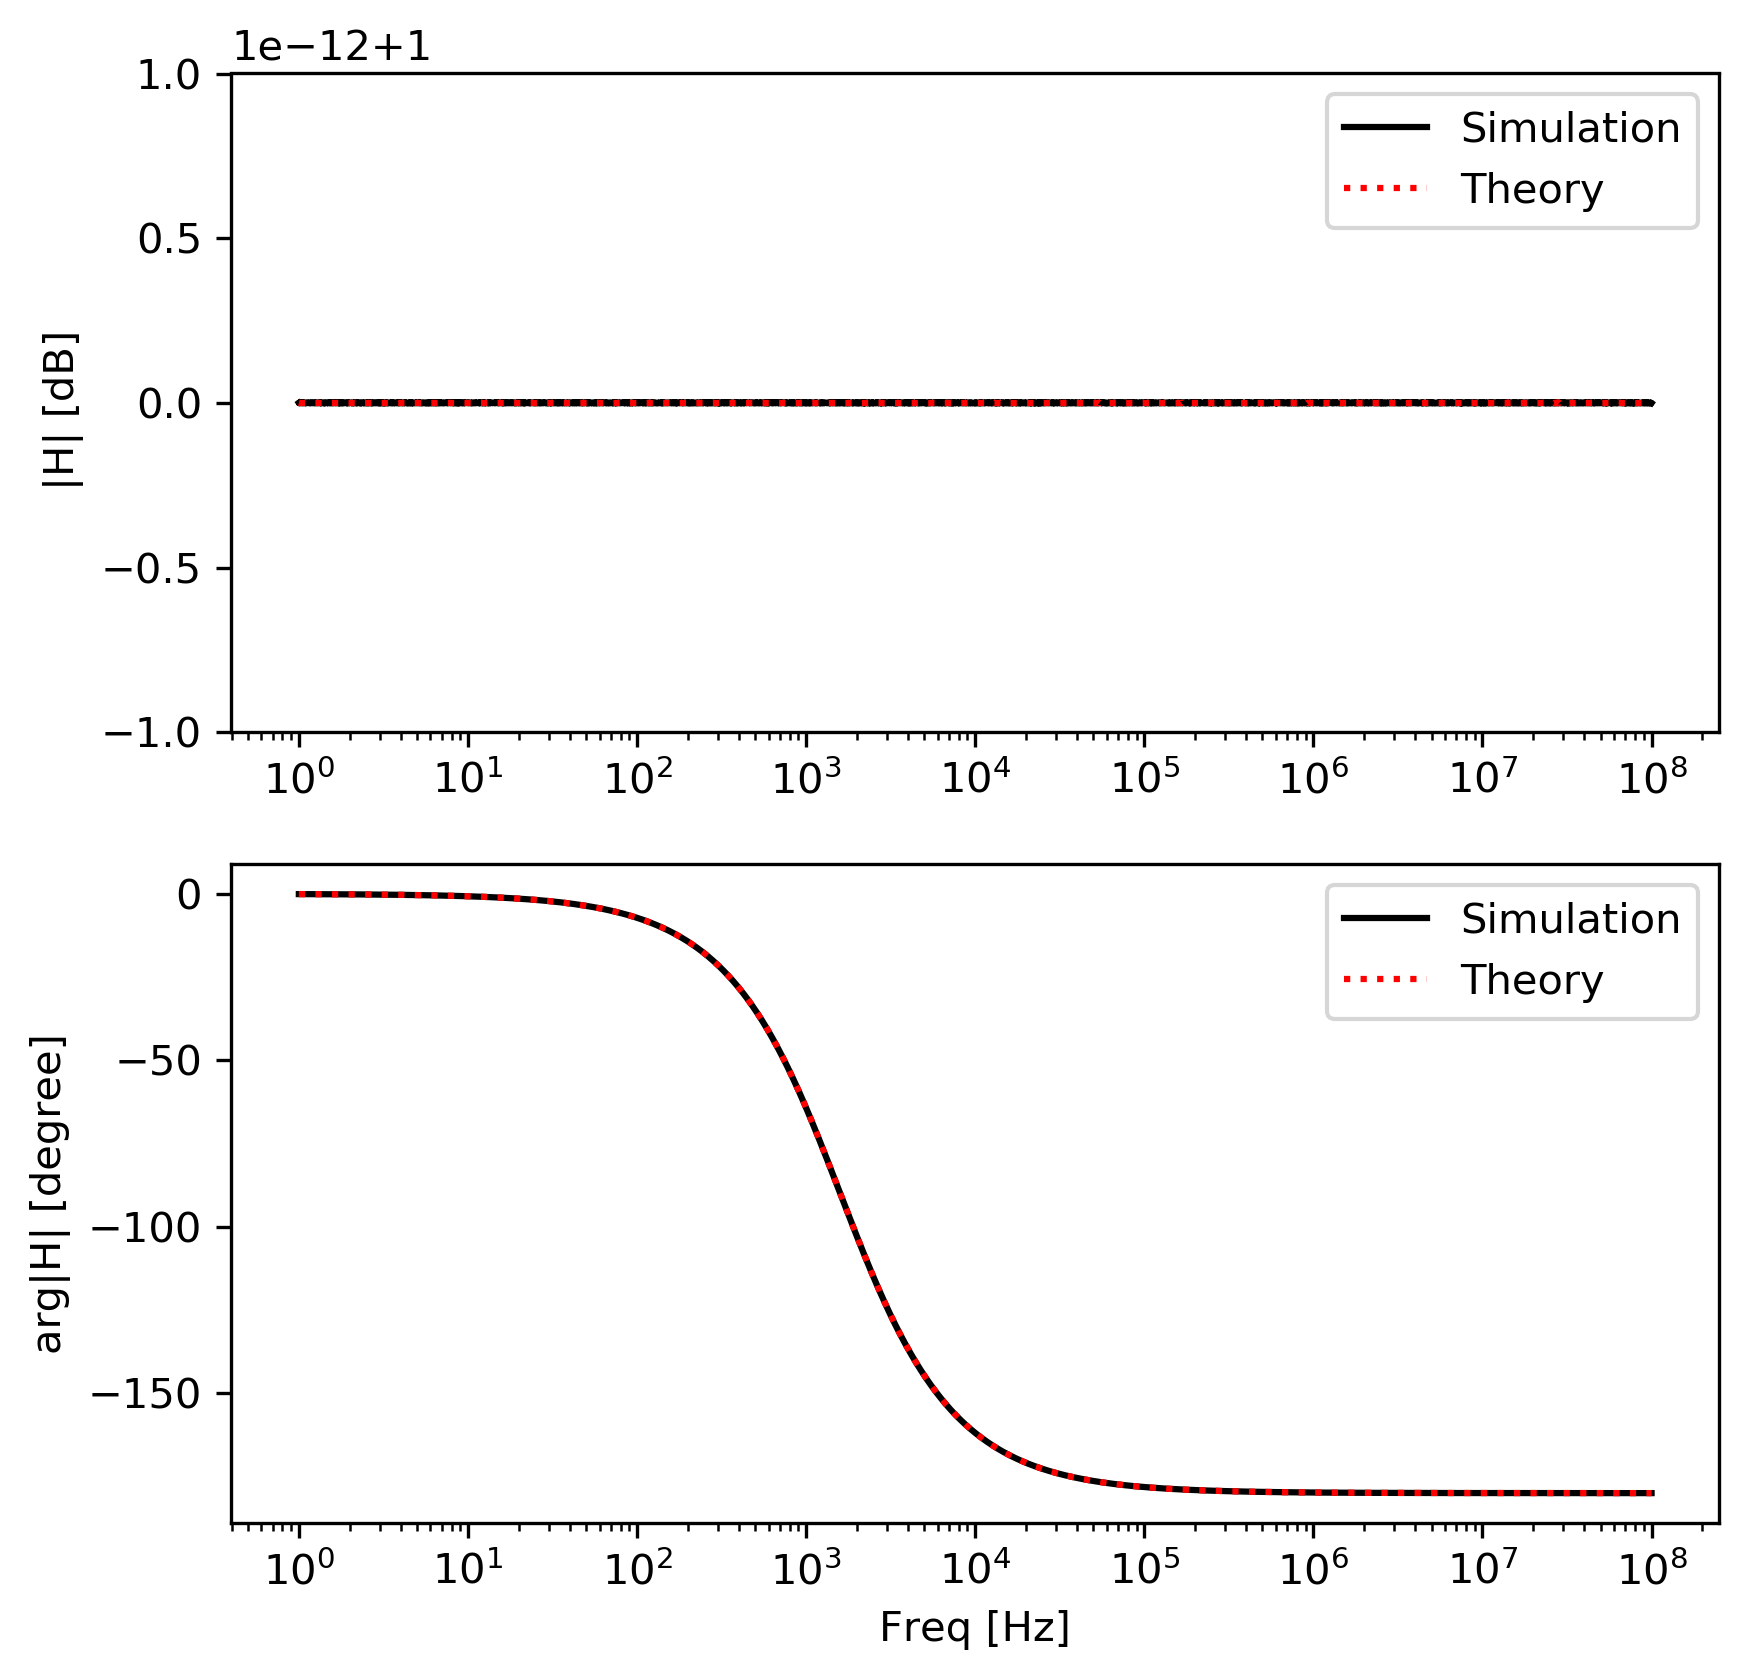

In [155]:
filename = 'p1_1_b_apf.txt' #データファイル名
filename2 = 'p1_1_b_apf_s.txt' #データファイル名

df = pd.read_table(filename, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
df2 = pd.read_table(filename2, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)

df['Complex'] = df['Re'] + 1j * df['Im']
df['Amp'] = np.absolute(df['Complex'])
df['Amp_dB'] = 20 * np.log10(df['Amp'])
df['Amp_dB'] = df['Amp'] 
df['Phase'] = np.angle(df['Complex']) * 180 / np.pi

df2['Complex'] = df2['Re'] + 1j * df2['Im']
df2['Amp'] = np.absolute(df2['Complex'])
df2['Amp_dB'] = 20 * np.log10(df2['Amp'])
df2['Phase'] = np.angle(df2['Complex']) * 180 / np.pi

#df.loc[df['Phase'] >= 0, 'Phase'] = df['Phase'] - 360

R = 1000
C = 0.1 * 10 ** -6
T = R*C
# df['H'] = 1 / (1 + 2j * np.pi * df['Freq'] * T ) #lpf
# df['H'] = 2j * np.pi * df['Freq'] * T / (1 + 1j * 2 * np.pi * df['Freq'] * T ) # hpf
df['H'] = (1 - 2j * np.pi * df['Freq'] * T) / (1 + 2j * np.pi * df['Freq'] * T)# apf

df['apf_H'] = df['Amp'] / df2['Amp']
df['Amp_dB'] = df['apf_H']

df['H_theory'] = np.absolute(df['H'])
# df['Amp_dB_theory'] = 20 * np.log10(df['H_theory'])
df['Amp_dB_theory']  = df['H_theory'] 
df['Phase_theory'] = np.angle(df['H']) * 180 / np.pi


fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df['Freq'], df['Amp_dB'], color='black', label = 'Simulation')
ax1.plot(df['Freq'], df['Amp_dB_theory'], color = 'red', linestyle = 'dotted', label = 'Theory')
ax1.set_ylabel("|H| [dB] ")
ax1.set_xscale("log")
ax1.legend()

#位相のプロット
ax2.plot(df['Freq'], df['Phase'], color='black', label = 'Simulation')
ax2.plot(df['Freq'], df['Phase_theory'], color = 'red', linestyle = 'dotted', label = 'Theory')
ax2.set_xlabel("Freq [Hz]")
ax2.set_ylabel("arg|H| [degree]")
ax2.set_xscale("log")
ax2.legend()

#グラフ画像保存
plt.savefig(filename + 'sim1.png')
plt.show()

/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


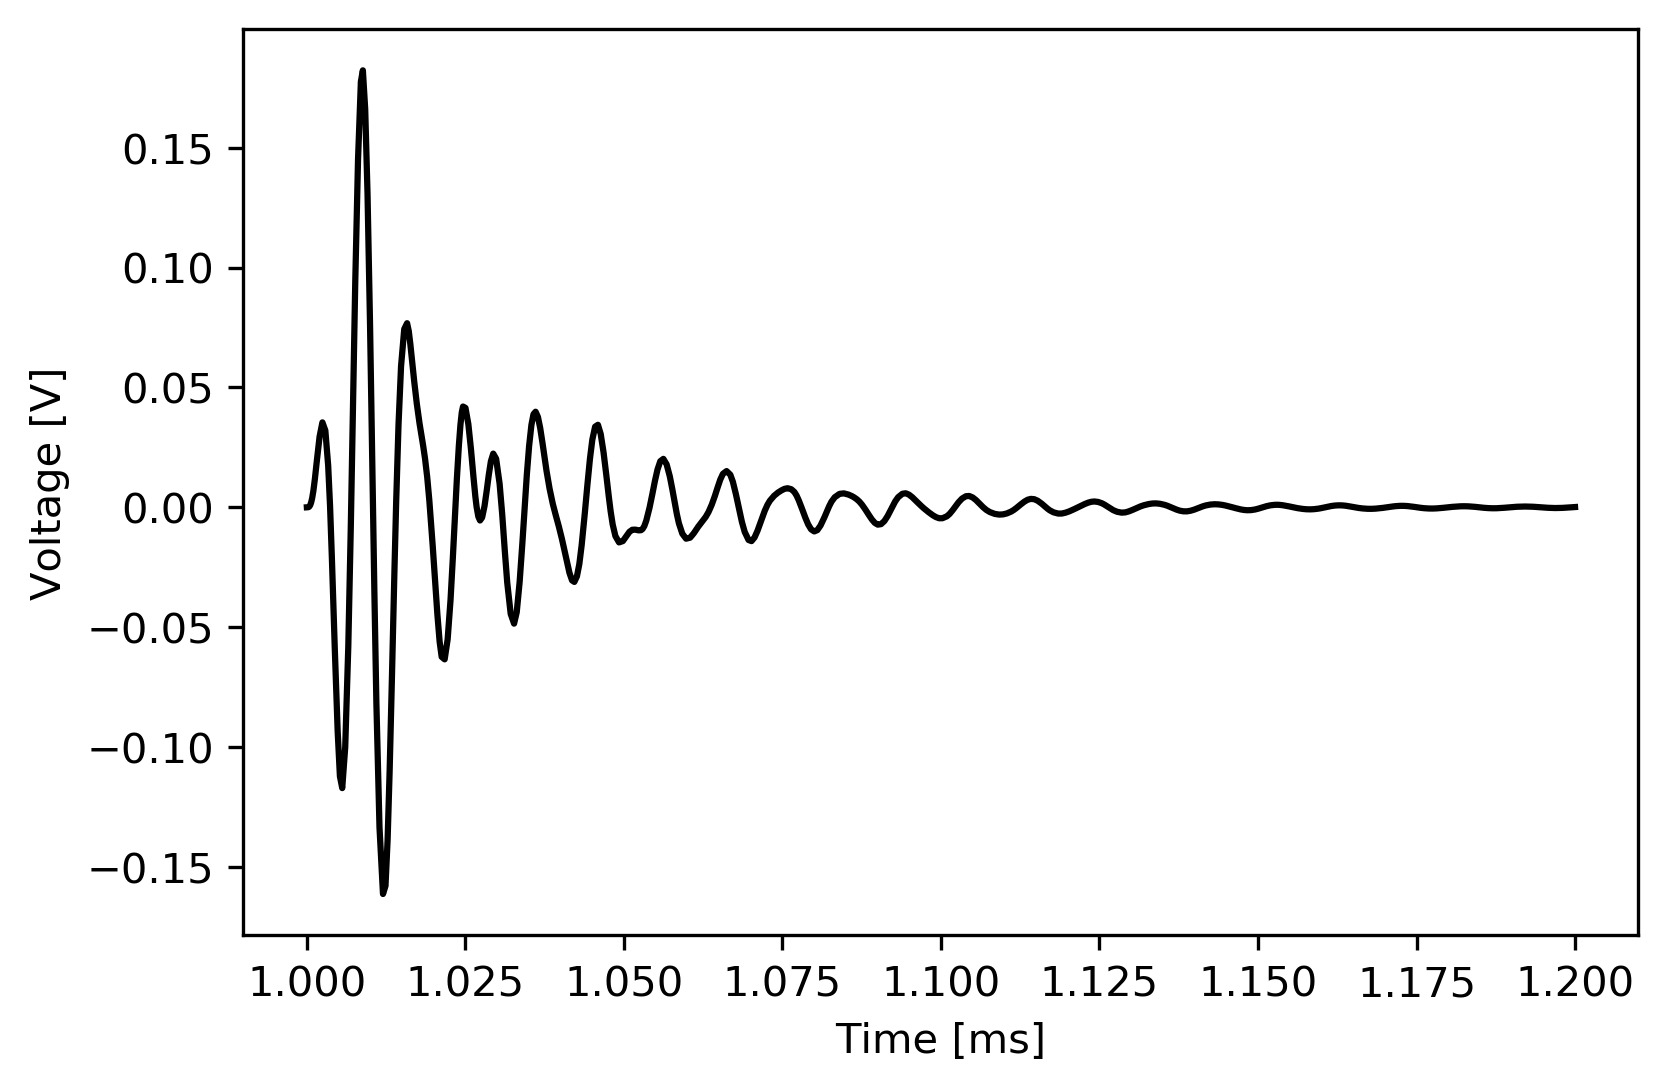

In [76]:
filename = '5_chev_step.txt'
# filename = 'p1_1_b_lpf_step.txt'
# filename = 'p1_1_b_hpf_step.txt'

df = pd.read_table(filename, names=('Time', 'Voltage'), skiprows=1)

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
#plt.xlim(0.90, 2.0)
plt.ylabel('Voltage [V]')
plt.plot(df['Time'] / 0.001 + 1, df['Voltage'], color='black') #横軸をmsに変換
plt.savefig(filename + 'sim.png')
plt.show()


/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Users/taiyoslime/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


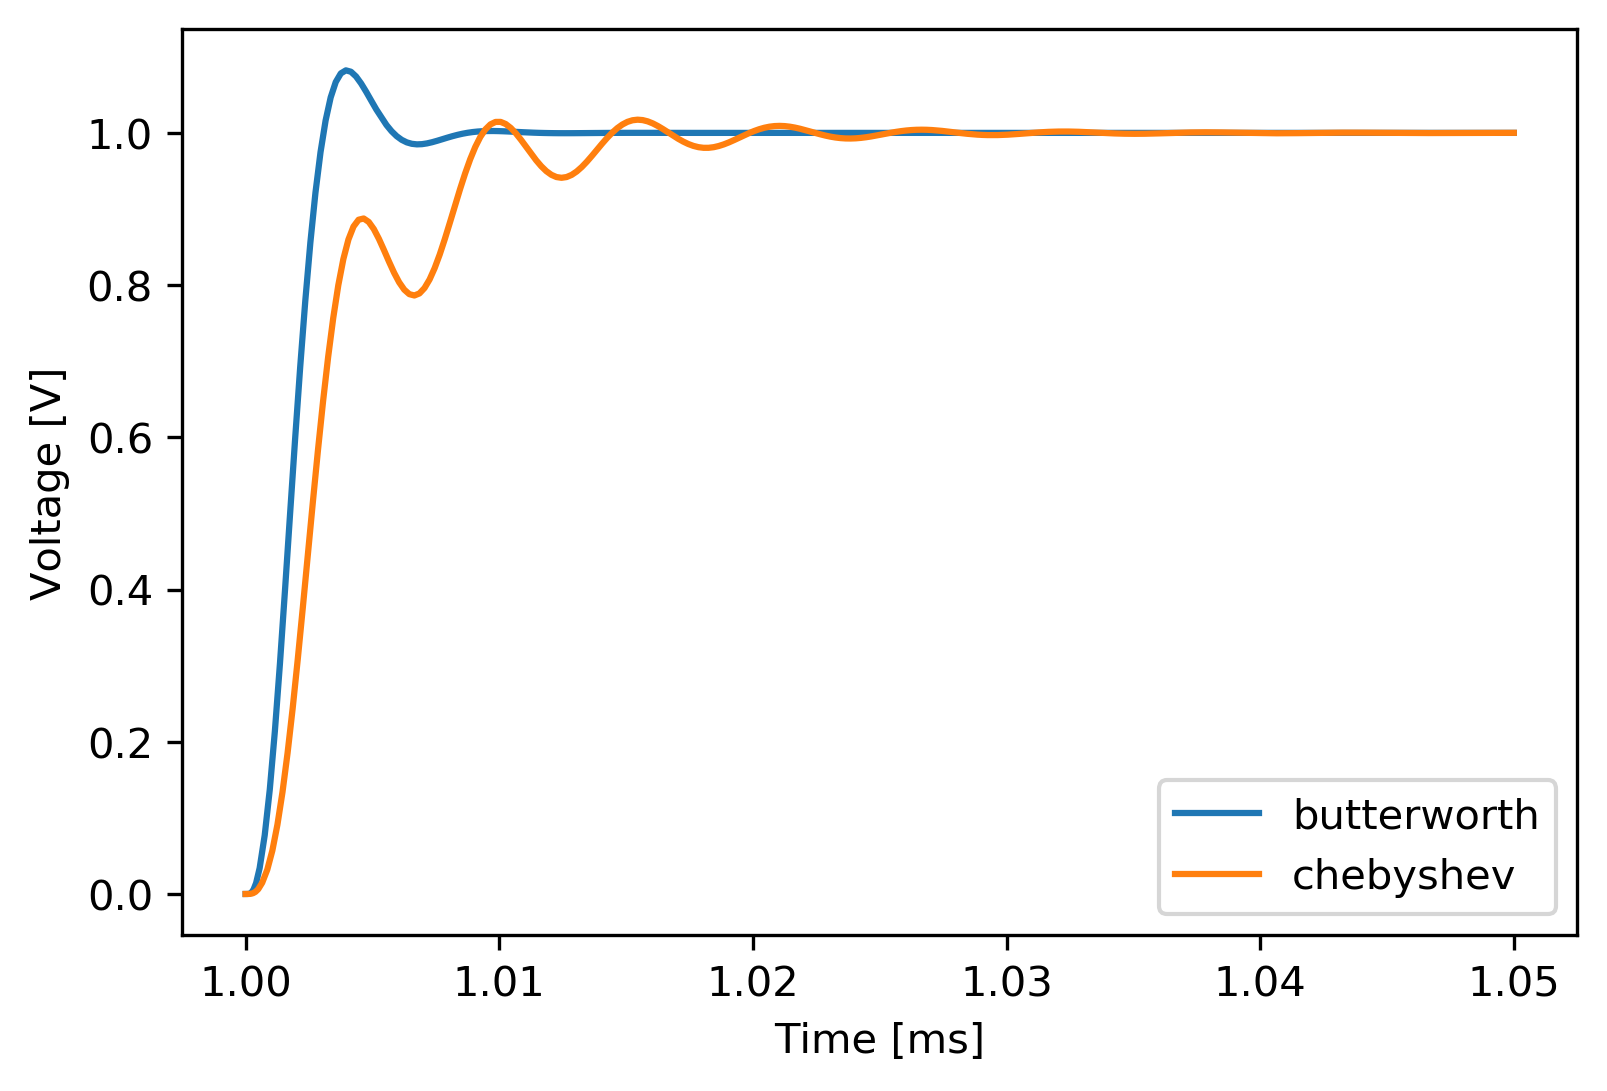

In [99]:
filename = '3_butter_step.txt'
filename2 = '3_chev_step.txt'
# filename = 'p1_1_b_lpf_step.txt'
# filename = 'p1_1_b_hpf_step.txt'

df = pd.read_table(filename, names=('Time', 'Voltage'), skiprows=1)
df2 = pd.read_table(filename2, names=('Time', 'Voltage'), skiprows=1)

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
#plt.xlim(0.90, 2.0)
plt.ylabel('Voltage [V]')
plt.plot(df['Time'] / 0.001 + 1, df['Voltage'], label='butterworth')
plt.plot(df2['Time'] / 0.001 + 1, df2['Voltage'], label='chebyshev') #横軸をmsに変換
plt.legend()
plt.savefig(filename + 'sim.png')
plt.show()


0.0011020093263605908


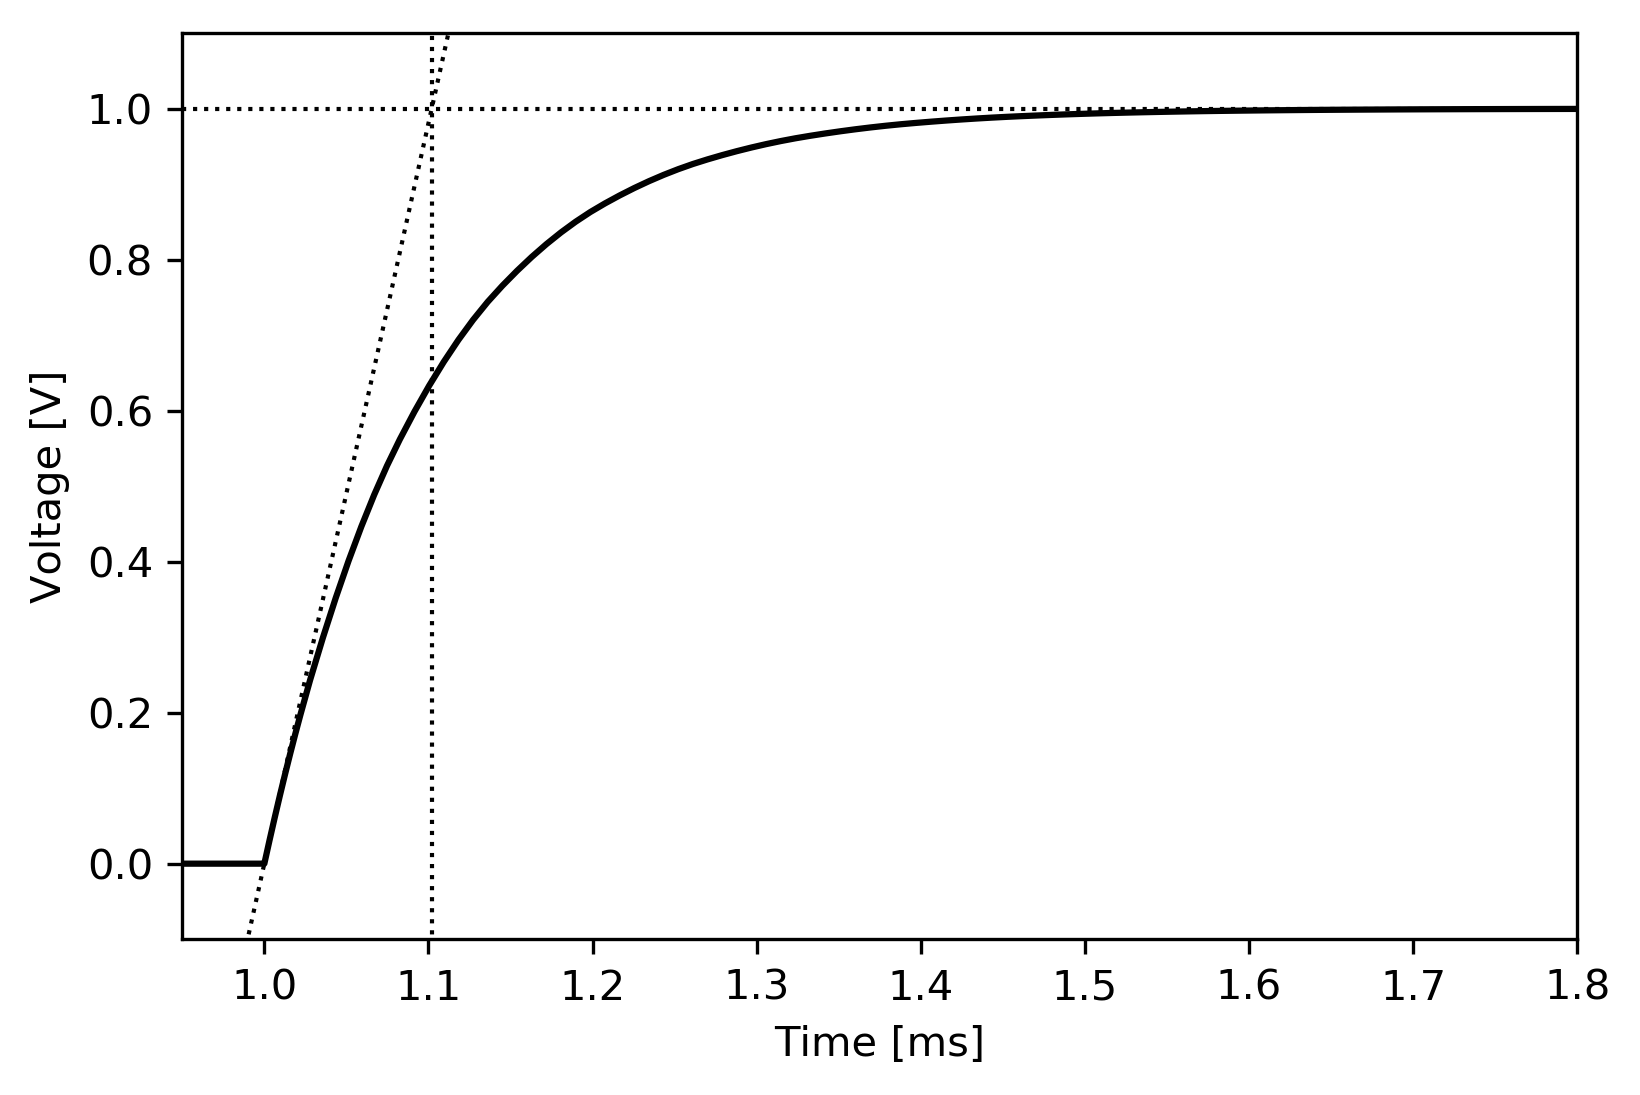

In [181]:
filename = 'p1_1_b_lpf_step.txt'
# filename = 'p1_1_b_hpf_step.txt'

df = pd.read_table(filename, names=('Time', 'Voltage'), skiprows=1)

a = (3.126400e-02 - 5.012981e-04) / (1.003237206430319e-03 - 1.000100000000000e-03)
b = - a * 1.000028478237531e-03 
print((1 - b) / a )
df['fit'] = df['Time'] * a + b

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
plt.xlim(0.95, 1.8)
plt.ylim(-0.1, 1.1)
plt.ylabel('Voltage [V]')
plt.plot(df['Time'] / 0.001, df['Voltage'], color='black') #横軸をmsに変換
plt.plot(df['Time'] / 0.001, df['fit'], color='black', linestyle = 'dotted', linewidth = 1.0) 



0.0011020093263605908
plt.plot([0.95, 1.8], [1.0, 1.0], color='black', linestyle = 'dotted', linewidth = 1.0) 
plt.vlines([0.0011020093263605908 / 0.001], -1.0, 1.2, color='black', linestyle = 'dotted', linewidth = 1.0) 
plt.savefig(filename + '_k.png')
plt.show()

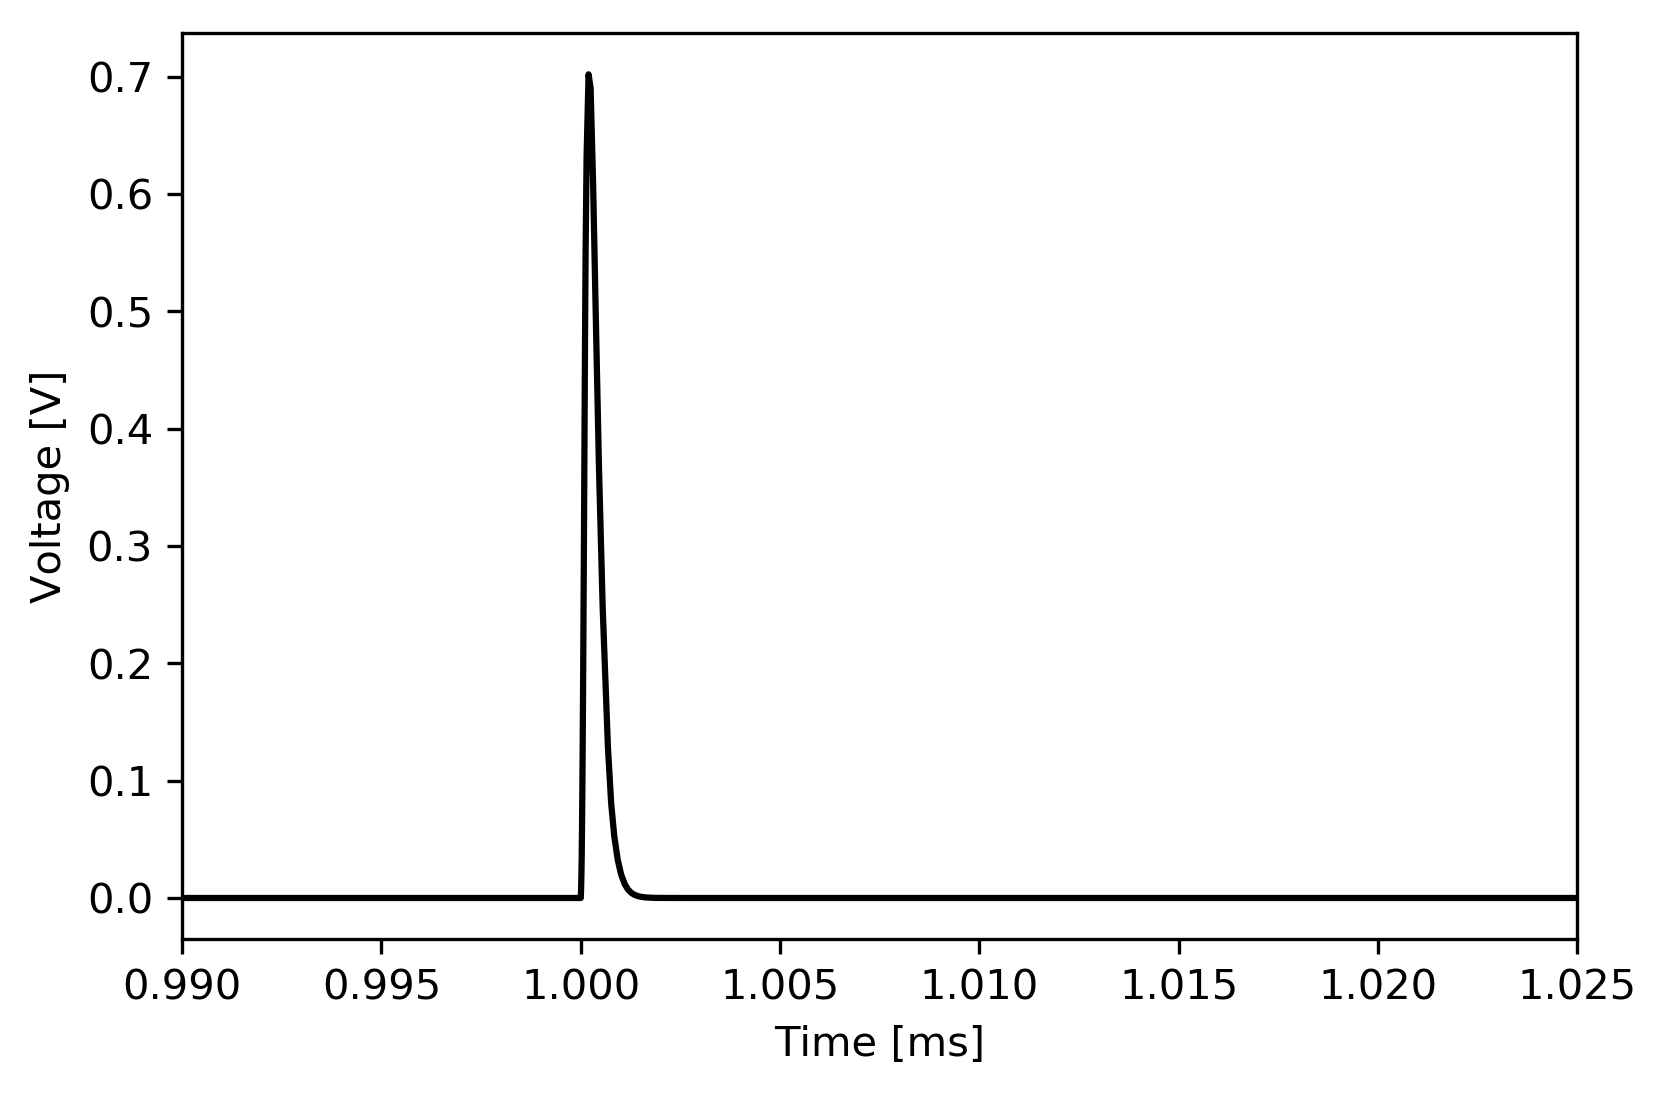

In [122]:
# filename = 'p1_1_b_5000.txt'

filename = 'p1_1_b_634.txt'


df = pd.read_table(filename, names=('Time', 'Voltage'), skiprows=1)

plt.figure(dpi = 300)
plt.xlim(0.99, 1.025)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [V]')
plt.plot(df['Time'] / 0.001, df['Voltage'], color='black') #横軸をmsに変換
plt.savefig(filename + 'sim.png')
plt.show()